# Floating-point operation count for tetrahedra

In [1]:
using StableSpectralElements, Plots, JLD2, LaTeXStrings

Precompiling StableSpectralElements
  ✓ Extents
  ✓ ADTypes
  ✓ InverseFunctions
  ✓ Compat
  ✓ LazilyInitializedFields
  ✓ OffsetArrays
  ✓ IOCapture
  ✓ Functors
  ✓ TranscodingStreams
  ✓ RuntimeGeneratedFunctions
  ✓ Inflate
  ✓ FastLapackInterface
  ✓ BitFlags
  ✓ StaticArraysCore
  ✓ TZJData
  ✓ MarkdownAST
  ✓ FillArrays
  ✓ EnzymeCore
  ✓ LinearMaps
  ✓ Missings
  ✓ LogExpFunctions
  ✓ Adapt
  ✓ MPIPreferences
  ✓ Latexify
  ✓ TimerOutputs
  ✓ KLU
  ✓ CPUSummary
  ✓ FileIO
  ✓ Xorg_libICE_jll
  ✓ Libuuid_jll
  ✓ IntelOpenMP_jll
  ✓ JpegTurbo_jll
  ✓ FriBidi_jll
  ✓ XML2_jll
  ✓ LAME_jll
  ✓ Pixman_jll
  ✓ libaom_jll
  ✓ Expat_jll
  ✓ LZO_jll
  ✓ MutableArithmetics
  ✓ Libmount_jll
  ✓ oneTBB_jll
  ✓ Libgpg_error_jll
  ✓ IterativeSolvers
  ✓ Krylov
  ✓ FixedPointNumbers
  ✓ Triangulate
  ✓ InlineStrings
  ✓ FreeType2_jll
  ✓ InverseFunctions → DatesExt
  ✓ CompositionsBase → CompositionsBaseInverseFunctionsExt
  ✓ GeoInterface
  ✓ Compat → CompatLinearAlgebraExt
  ✓ RegistryInst

  ✓ ExponentialUtilities
  ✓ VectorizationBase
  ✓ StartUpDG
  ✓ SLEEFPirates
  ✓ SciMLBase
  ✓ SciMLBase → SciMLBaseChainRulesCoreExt
  ✓ DiffEqBase
  ✓ DiffEqBase → DiffEqBaseUnitfulExt
  ✓ DiffEqBase → DiffEqBaseChainRulesCoreExt
  ✓ DiffEqCallbacks
  ✓ LoopVectorization
  ✓ LoopVectorization → SpecialFunctionsExt
  ✓ LoopVectorization → ForwardDiffExt
  ✓ TriangularSolve
  ✓ Octavian
  ✓ Octavian → ForwardDiffExt
  ✓ RecursiveFactorization
  ✓ SimpleNonlinearSolve
  ✓ SimpleNonlinearSolve → SimpleNonlinearSolveChainRulesCoreExt
  ✓ Plots
  ✓ Plots → FileIOExt
  ✓ StartUpDG → TriangulatePlotsExt
  ✓ Plots → UnitfulExt
  ✓ Plots → GeometryBasicsExt
  ✓ Plots → IJuliaExt
  ✓ LinearSolve
  ✓ LinearSolve → LinearSolveIterativeSolversExt
  ✓ LinearSolve → LinearSolveKrylovKitExt
  ✓ LinearSolve → LinearSolveRecursiveArrayToolsExt
  ✓ NonlinearSolve
  ✓ NonlinearSolve → NonlinearSolveNLsolveExt
  ✓ OrdinaryDiffEq
  ✓ StableSpectralElements
  220 dependencies successfully precompiled in 28

In [5]:
reference_path = "../../results/test/flops_reference/"
#=
p_nm_ref = load_object(string(reference_path,"NodalMulti_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_nm_ref = load_object(string(reference_path,"NodalMulti_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

p_mm_ref = load_object(string(reference_path,"ModalMulti_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_mm_ref = load_object(string(reference_path,"ModalMulti_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

p_nt_ref = load_object(string(reference_path,"NodalTensor_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_nt_ref = load_object(string(reference_path,"NodalTensor_Tri_SkewSymmetricMapping/upwind/flops.jld2"))
=#
p_mt_ref = load_object(string(reference_path,"ModalTensor_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_mt_ref = load_object(string(reference_path,"ModalTensor_Tri_SkewSymmetricMapping/upwind/flops.jld2"))
#=
physical_path = "../results/flops_physical/"

p_nm_phys = load_object(string(physical_path,"NodalMulti_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_nm_phys = load_object(string(physical_path,"NodalMulti_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

p_mm_phys = load_object(string(physical_path,"ModalMulti_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_mm_phys = load_object(string(physical_path,"ModalMulti_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

p_nt_phys = load_object(string(physical_path,"NodalTensor_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_nt_phys = load_object(string(physical_path,"NodalTensor_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

p_mt_phys = load_object(string(physical_path,"ModalTensor_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_mt_phys = load_object(string(physical_path,"ModalTensor_Tri_SkewSymmetricMapping/upwind/flops.jld2"));
=#

5-element Vector{Float64}:
  1314.0
  2716.0
  4880.0
  7974.0
 12166.0

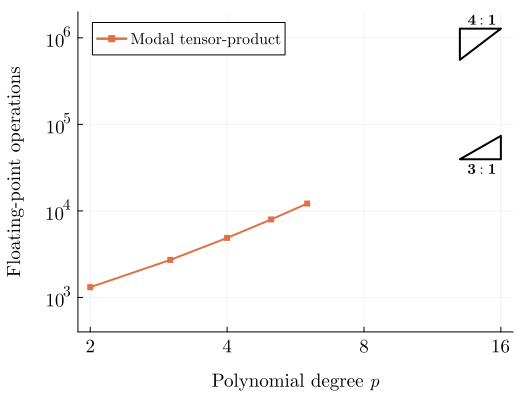

In [11]:
plt = plot(legend=:topleft, xlabel="\nPolynomial degree \$p\$", 
    xscale=:log10, yscale=:log10, ylims=[4*10^2,2*10^6],
    ylabel="Floating-point operations\n", fontfamily="Computer Modern", legendfontsize=10,
    xguidefontsize=12, yguidefontsize=12, xtickfontsize=12, ytickfontsize=12,
    xticks=([2,4,8,16], string.([2,4,8,16])), size=(525,400))
#=
plot!(plt, collect(2:16), flops_nt_phys[1:15], label="", 
    markershape=:square, linestyle=:dot, markersize=3, linewidth=2, 
    markerstrokewidth=0.0, markerstrokecolor=:orangered4, color=:orangered4)
plot!(plt, collect(2:16), flops_mt_phys[1:15], label="", 
    markershape=:square, linestyle=:dot, markersize=3, linewidth=2, 
    markerstrokewidth=0.0, markerstrokecolor=palette(:default)[2], color=palette(:default)[2])
plot!(plt, collect(2:16), flops_nm_phys[1:15], label="",  
    markershape=:circle, linestyle=:dot, markersize=3, linewidth=2, 
    markerstrokewidth=0.0, color=:slateblue4)
plot!(plt, collect(2:16), flops_mm_phys[1:15], label="",  
    markershape=:circle, linestyle=:dot, markersize=3, linewidth=2, 
    markerstrokewidth=0.0, color=palette(:default)[1])
plot!(plt, collect(2:16), flops_nt_ref[1:15], label="Nodal tensor-product", 
    markershape=:square, markersize=3, linewidth=2, 
    markerstrokewidth=0.0, markerstrokecolor=:orangered4, color=:orangered4)
=#
plot!(plt, collect(2:6), flops_mt_ref[1:5], label="Modal tensor-product", 
    markershape=:square, markersize=3, linewidth=2, 
    markerstrokewidth=0.0, markerstrokecolor=palette(:default)[2], color=palette(:default)[2])
#=
plot!(plt, collect(2:16), flops_nm_ref[1:15], label="Nodal multidimensional",  
    markershape=:circle, markersize=3, linewidth=2, 
    markerstrokewidth=0.0, color=:slateblue4)
plot!(plt, collect(2:16), flops_mm_ref[1:15], label="Modal multidimensional",  
    markershape=:circle, markersize=3, linewidth=2, 
    markerstrokewidth=0.0, color=palette(:default)[1])
=#
r1 = 13
r2 = 16
plot!(plt, [r1, r2, r2, r1], 18*[r1^3, r2^3, r1^3, r1^3], label=:none, 
    linewidth=2, color=:black, annotations = ([14.6], [3.05*10^4], L"\mathbf{3:1}", 10))
plot!(plt, [r1, r2, r1, r1], 19.5*[r1^4, r2^4, r2^4, r1^4], label=:none, 
    linewidth=2, color=:black, annotations = ([14.6], [1.62*10^6], L"\mathbf{4:1}", 10))

In [4]:
savefig(plt, "../plots/flops/flops_tri.pdf")

"/Users/tristanmontoya/Research/ReproduceSBPSimplex/plots/flops/flops_tri.pdf"